In [1]:
# Import all the necessary libraries.
import numpy as np
import timeit
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut

In [2]:
# Definiton of the function that creates the data set.
def genDataSet(N, seed):
    # Reset PN generator.
    np.random.seed(seed)
    # Attribute.
    x = np.linspace(-6, 6, N).reshape(N, 1)
    # Fifth order target function.
    y = 2.33*x**5 + 5.3*x**4 - 3.2*x**3 + 0.5*x**2 - x + 2
    # Noise.
    w = np.random.randn(N, 1)
    # Observable function.
    y_noisy = y + w
    # Return arrays.
    return x, y_noisy, y

# Holdout com 1000 amostras

In [3]:
# Define number of samples.
N = 1000

# Reset pseudo random generator.
seed = 0

# Generate data set.
x, y_noisy, y = genDataSet(N, seed)

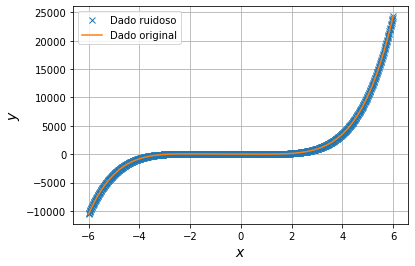

In [4]:
# Plot original data versus noisy version.
fig = plt.figure()
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.plot(x, y, label='Dado original')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
#Show the plot.
plt.show()

In [5]:
mse_val_shuffle_on1 = []
mse_train_shuffle_on1 = []

testSizes = [0.1, 0.3, 0.5, 0.7, 0.9]

for inc in range(0, len(testSizes)):
    
    tsize = testSizes[inc]
    
    mse_val_shuffle_on1.append([])
    mse_train_shuffle_on1.append([])
    
    for seedvar in range(0, 500):
        # Split the whole set into random training and validation set.
        x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=tsize, shuffle=True, random_state=seedvar)

        # Instantiate a polynomial.
        poly = PolynomialFeatures(degree=5, include_bias=True)
        # Instantiate a scaler.
        scaler = StandardScaler()
        # Instantiate a linear regressor.
        reg = LinearRegression()

        # Create a pipeline of actions.
        poly_reg = Pipeline([
            ("poly", poly),
            ("scaler", scaler),
            ("reg", reg),
        ])

        poly_reg.fit(x_train, y_train)

        y_train_predict = poly_reg.predict(x_train)

        y_val_predict = poly_reg.predict(x_val)

        mse_val_shuffle_on1[inc].append(mean_squared_error(y_val, y_val_predict))

        mse_train_shuffle_on1[inc].append(mean_squared_error(y_train, y_train_predict))

# Holdout com 10000 amostras

In [6]:
# Define number of samples.
N = 10000

# Reset pseudo random generator.
seed = 0

# Generate data set.
x, y_noisy, y = genDataSet(N, seed)

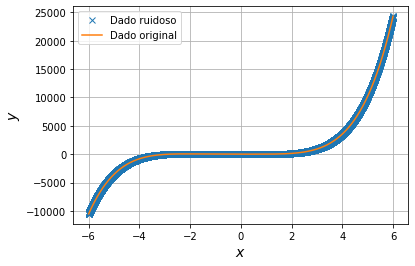

In [7]:
# Plot original data versus noisy version.
fig = plt.figure()
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.plot(x, y, label='Dado original')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
#Show the plot.
plt.show()

In [8]:
mse_val_shuffle_on2 = []
mse_train_shuffle_on2 = []

testSizes = [0.1, 0.3, 0.5, 0.7, 0.9]

for inc in range(0, len(testSizes)):
    
    tsize = testSizes[inc]
    
    mse_val_shuffle_on2.append([])
    mse_train_shuffle_on2.append([])
    
    for seedvar in range(0, 500):
        # Split the whole set into random training and validation set.
        x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=tsize, shuffle=True, random_state=seedvar)

        # Instantiate a polynomial.
        poly = PolynomialFeatures(degree=5, include_bias=True)
        # Instantiate a scaler.
        scaler = StandardScaler()
        # Instantiate a linear regressor.
        reg = LinearRegression()

        # Create a pipeline of actions.
        poly_reg = Pipeline([
            ("poly", poly),
            ("scaler", scaler),
            ("reg", reg),
        ])

        poly_reg.fit(x_train, y_train)

        y_train_predict = poly_reg.predict(x_train)

        y_val_predict = poly_reg.predict(x_val)

        mse_val_shuffle_on2[inc].append(mean_squared_error(y_val, y_val_predict))

        mse_train_shuffle_on2[inc].append(mean_squared_error(y_train, y_train_predict))

Validation 1000:
test size = 0.10: MSE mean: 0.9815 - MSE var: 0.0193
test size = 0.30: MSE mean: 0.9760 - MSE var: 0.0046
test size = 0.50: MSE mean: 0.9810 - MSE var: 0.0019
test size = 0.70: MSE mean: 0.9907 - MSE var: 0.0009
test size = 0.90: MSE mean: 1.0339 - MSE var: 0.0022

Validation 10000:
test size = 0.10: MSE mean: 0.9757 - MSE var: 0.0016
test size = 0.30: MSE mean: 0.9768 - MSE var: 0.0004
test size = 0.50: MSE mean: 0.9770 - MSE var: 0.0002
test size = 0.70: MSE mean: 0.9779 - MSE var: 0.0001
test size = 0.90: MSE mean: 0.9812 - MSE var: 0.0000

Training 1000:
test size = 0.10: MSE mean: 0.9630 - MSE var: 0.0002
test size = 0.30: MSE mean: 0.9628 - MSE var: 0.0008
test size = 0.50: MSE mean: 0.9592 - MSE var: 0.0018
test size = 0.70: MSE mean: 0.9492 - MSE var: 0.0041
test size = 0.90: MSE mean: 0.9145 - MSE var: 0.0156

Training 10000:
test size = 0.10: MSE mean: 0.9747 - MSE var: 0.0000
test size = 0.30: MSE mean: 0.9741 - MSE var: 0.0001
test size = 0.50: MSE mean: 0.

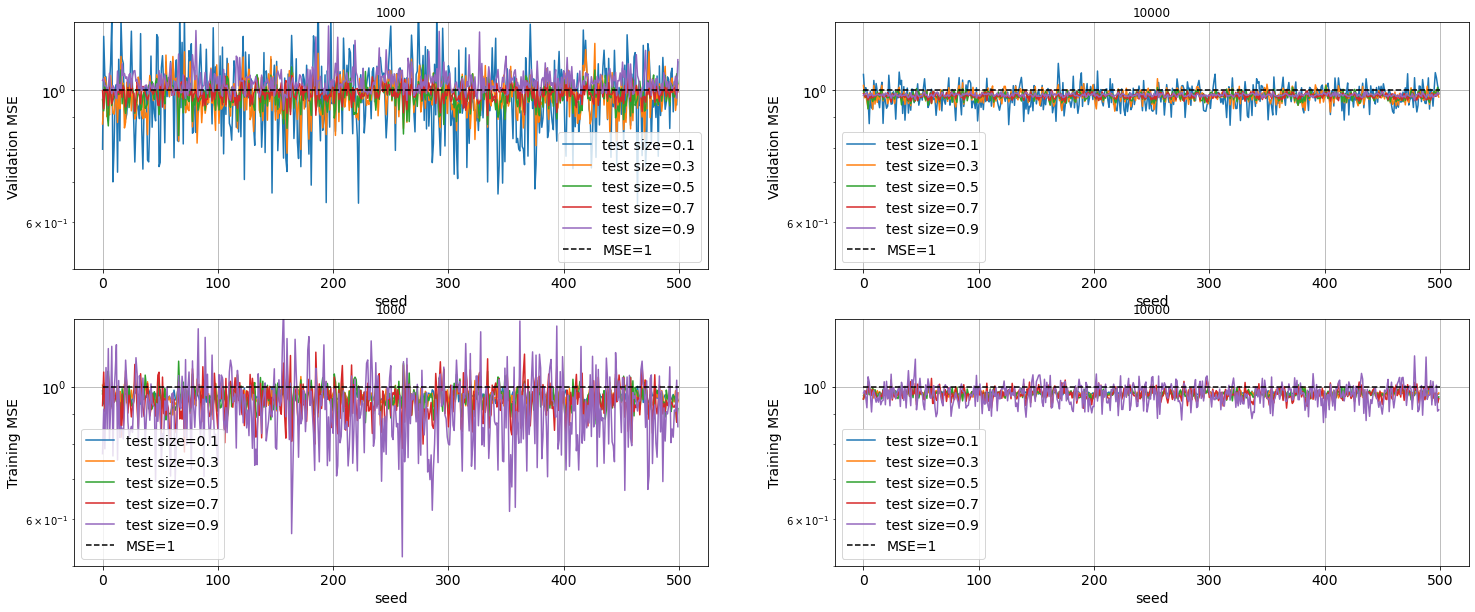

In [9]:
plt.figure(figsize=(25, 10))

print('Validation 1000:')
ax = plt.subplot(2, 2, 1)
for k in range(0,len(testSizes)):
    plt.plot(mse_val_shuffle_on1[k], label='test size='+str(testSizes[k]))
    print('test size = %1.2f: MSE mean: %1.4f - MSE var: %1.4f' % (testSizes[k], np.mean(mse_val_shuffle_on1[k]), np.var(mse_val_shuffle_on1[k])))
plt.plot([0, 500], [1, 1], 'k--', label='MSE=1')
plt.ylabel('Validation MSE', fontsize=14)
plt.xlabel('seed', fontsize=14)
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.title('1000')
plt.ylim([5e-1, 1.3])
plt.grid()

print('\nValidation 10000:')
ax = plt.subplot(2, 2, 2)
for k in range(0,len(testSizes)):
    plt.plot(mse_val_shuffle_on2[k], label='test size='+str(testSizes[k]))
    print('test size = %1.2f: MSE mean: %1.4f - MSE var: %1.4f' % (testSizes[k], np.mean(mse_val_shuffle_on2[k]), np.var(mse_val_shuffle_on2[k])))
plt.plot([0, 500], [1, 1], 'k--', label='MSE=1')
plt.ylabel('Validation MSE', fontsize=14)
plt.xlabel('seed', fontsize=14)
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.title('10000')
plt.ylim([5e-1, 1.3])
plt.grid()

print('\nTraining 1000:')
ax = plt.subplot(2, 2, 3)
for k in range(0,len(testSizes)):
    plt.plot(mse_train_shuffle_on1[k], label='test size='+str(testSizes[k]))
    print('test size = %1.2f: MSE mean: %1.4f - MSE var: %1.4f' % (testSizes[k], np.mean(mse_train_shuffle_on1[k]), np.var(mse_train_shuffle_on1[k])))
plt.plot([0, 500], [1, 1], 'k--', label='MSE=1')
plt.ylabel('Training MSE', fontsize=14)
plt.xlabel('seed', fontsize=14)
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.title('1000')
plt.ylim([5e-1, 1.3])
plt.grid()

print('\nTraining 10000:')
ax = plt.subplot(2, 2, 4)
for k in range(0,len(testSizes)):
    plt.plot(mse_train_shuffle_on2[k], label='test size='+str(testSizes[k]))
    print('test size = %1.2f: MSE mean: %1.4f - MSE var: %1.4f' % (testSizes[k], np.mean(mse_train_shuffle_on2[k]), np.var(mse_train_shuffle_on2[k])))
plt.plot([0, 500], [1, 1], 'k--', label='MSE=1')
plt.ylabel('Training MSE', fontsize=14)
plt.xlabel('seed', fontsize=14)
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.title('10000')
plt.ylim([5e-1, 1.3])
plt.grid()

plt.show()